### Install the libraries

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.ensemble import IsolationForest

url = 'https://raw.githubusercontent.com/sabghat90/ExtraSensory_Dataset/refs/heads/main/features_labels.csv'

df = pd.read_csv(url)

In [14]:
df.head()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,...,label:STAIRS_-_GOING_DOWN,label:ELEVATOR,label:OR_standing,label:AT_SCHOOL,label:PHONE_IN_HAND,label:PHONE_IN_BAG,label:PHONE_ON_TABLE,label:WITH_CO-WORKERS,label:WITH_FRIENDS,label_source
0,1464129912,1.011438,0.012573,0.023013,0.041240,1.006184,1.010868,1.016028,0.935099,6.684536,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
1,1464129950,1.011233,0.009356,-0.005622,0.016687,1.006338,1.010926,1.016657,1.732968,6.684569,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
2,1464130031,1.013422,0.018068,-0.008593,0.039286,1.004077,1.012983,1.021926,1.464639,6.684453,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
3,1464130109,1.014891,0.016400,0.021383,0.038825,1.005934,1.014670,1.023000,1.440043,6.684483,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2
4,1464130130,1.017487,0.022632,-0.012891,0.037226,1.006040,1.017587,1.028168,1.937362,6.684364,...,0.0,NaN,0.0,0.0,NaN,NaN,NaN,1.0,0.0,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Columns: 278 entries, timestamp to label_source
dtypes: float64(274), int64(4)
memory usage: 5.7 MB


In [10]:
pd.set_option('display.max_columns', 278)
pd.set_option('display.max_rows', 2684)

In [11]:
df.describe()

,timestamp,raw_acc:magnitude_stats:mean,raw_acc:magnitude_stats:std,raw_acc:magnitude_stats:moment3,raw_acc:magnitude_stats:moment4,raw_acc:magnitude_stats:percentile25,raw_acc:magnitude_stats:percentile50,raw_acc:magnitude_stats:percentile75,raw_acc:magnitude_stats:value_entropy,raw_acc:magnitude_stats:time_entropy,raw_acc:magnitude_spectrum:log_energy_band0,raw_acc:magnitude_spectrum:log_energy_band1,raw_acc:magnitude_spectrum:log_energy_band2,raw_acc:magnitude_spectrum:log_energy_band3,raw_acc:magnitude_spectrum:log_energy_band4,raw_acc:magnitude_spectrum:spectral_entropy,raw_acc:magnitude_autocorrelation:period,raw_acc:magnitude_autocorrelation:normalized_ac,raw_acc:3d:mean_x,raw_acc:3d:mean_y,raw_acc:3d:mean_z,raw_acc:3d:std_x,raw_acc:3d:std_y,raw_acc:3d:std_z,raw_acc:3d:ro_xy,raw_acc:3d:ro_xz,raw_acc:3d:ro_yz,proc_gyro:magnitude_stats:mean,proc_gyro:magnitude_stats:std,proc_gyro:magnitude_stats:moment3,proc_gyro:magnitude_stats:moment4,proc_gyro:magnitude_stats:percentile25,proc_gyro:magnitude_stats:percentile50,proc_gyro:magnitude_stats:percentile75,proc_gyro:magnitude_stats:value_entropy,proc_gyro:magnitude_stats:time_entropy,proc_gyro:magnitude_spectrum:log_energy_band0,proc_gyro:magnitude_spectrum:log_energy_band1,proc_gyro:magnitude_spectrum:log_energy_band2,proc_gyro:magnitude_spectrum:log_energy_band3,proc_gyro:magnitude_spectrum:log_energy_band4,proc_gyro:magnitude_spectrum:spectral_entropy,proc_gyro:magnitude_autocorrelation:period,proc_gyro:magnitude_autocorrelation:normalized_ac,proc_gyro:3d:mean_x,proc_gyro:3d:mean_y,proc_gyro:3d:mean_z,proc_gyro:3d:std_x,proc_gyro:3d:std_y,proc_gyro:3d:std_z,proc_gyro:3d:ro_xy,proc_gyro:3d:ro_xz,proc_gyro:3d:ro_yz,raw_magnet:magnitude_stats:mean,raw_magnet:magnitude_stats:std,raw_magnet:magnitude_stats:moment3,raw_magnet:magnitude_stats:moment4,raw_magnet:magnitude_stats:percentile25,raw_magnet:magnitude_stats:percentile50,raw_magnet:magnitude_stats:percentile75,raw_magnet:magnitude_stats:value_entropy,raw_magnet:magnitude_stats:time_entropy,raw_magnet:magnitude_spectrum:log_energy_band0,raw_magnet:magnitude_spectrum:log_energy_band1,raw_magnet:magnitude_spectrum:log_energy_band2,raw_magnet:magnitude_spectrum:log_energy_band3,raw_magnet:magnitude_spectrum:log_energy_band4,raw_magnet:magnitude_spectrum:spectral_entropy,raw_magnet:magnitude_autocorrelation:period,raw_magnet:magnitude_autocorrelation:normalized_ac,raw_magnet:3d:mean_x,raw_magnet:3d:mean_y,raw_magnet:3d:mean_z,raw_magnet:3d:std_x,raw_magnet:3d:std_y,raw_magnet:3d:std_z,raw_magnet:3d:ro_xy,raw_magnet:3d:ro_xz,raw_magnet:3d:ro_yz,raw_magnet:avr_cosine_similarity_lag_range0,raw_magnet:avr_cosine_similarity_lag_range1,raw_magnet:avr_cosine_similarity_lag_range2,raw_magnet:avr_cosine_similarity_lag_range3,raw_magnet:avr_cosine_similarity_lag_range4,watch_acceleration:magnitude_stats:mean,watch_acceleration:magnitude_stats:std,watch_acceleration:magnitude_stats:moment3,watch_acceleration:magnitude_stats:moment4,watch_acceleration:magnitude_stats:percentile25,watch_acceleration:magnitude_stats:percentile50,watch_acceleration:magnitude_stats:percentile75,watch_acceleration:magnitude_stats:value_entropy,watch_acceleration:magnitude_stats:time_entropy,watch_acceleration:magnitude_spectrum:log_energy_band0,watch_acceleration:magnitude_spectrum:log_energy_band1,watch_acceleration:magnitude_spectrum:log_energy_band2,watch_acceleration:magnitude_spectrum:log_energy_band3,watch_acceleration:magnitude_spectrum:log_energy_band4,watch_acceleration:magnitude_spectrum:spectral_entropy,watch_acceleration:magnitude_autocorrelation:period,watch_acceleration:magnitude_autocorrelation:normalized_ac,watch_acceleration:3d:mean_x,watch_acceleration:3d:mean_y,watch_acceleration:3d:mean_z,watch_acceleration:3d:std_x,watch_acceleration:3d:std_y,watch_acceleration:3d:std_z,watch_acceleration:3d:ro_xy,watch_acceleration:3d:ro_xz,watch_acceleration:3d:ro_yz,watch_acceleration:spectrum:x_log_energy_band0,watch_acceleration:spectrum:x_log_energy_b

In [14]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]

# Count unique values in label columns (assuming label columns start with "label:")
label_columns = [col for col in df.columns if col.startswith("label:")]
label_distribution = df[label_columns].sum()

missing_values, label_distribution

(lf_measurements:relative_humidity                                          2685
 label:LOC_beach                                                            2685
 label:AT_A_PARTY                                                           2685
 label:BICYCLING                                                            2685
 label:CLEANING                                                             2685
 label:LAB_WORK                                                             2685
 label:IN_CLASS                                                             2685
 label:AT_THE_GYM                                                           2685
 lf_measurements:proximity                                                  2685
 lf_measurements:screen_brightness                                          2685
 label:ELEVATOR                                                             2685
 location:min_altitude                                                      2685
 location:max_altitude      

### Missing values info
there is many columns which has missing or null values, some are completely null values. like 'label:LOC_beach', 'label:AT_A_PARTY' etc. some are minimal. let's fix this.

In [15]:
sns.set(style="whitegrid")

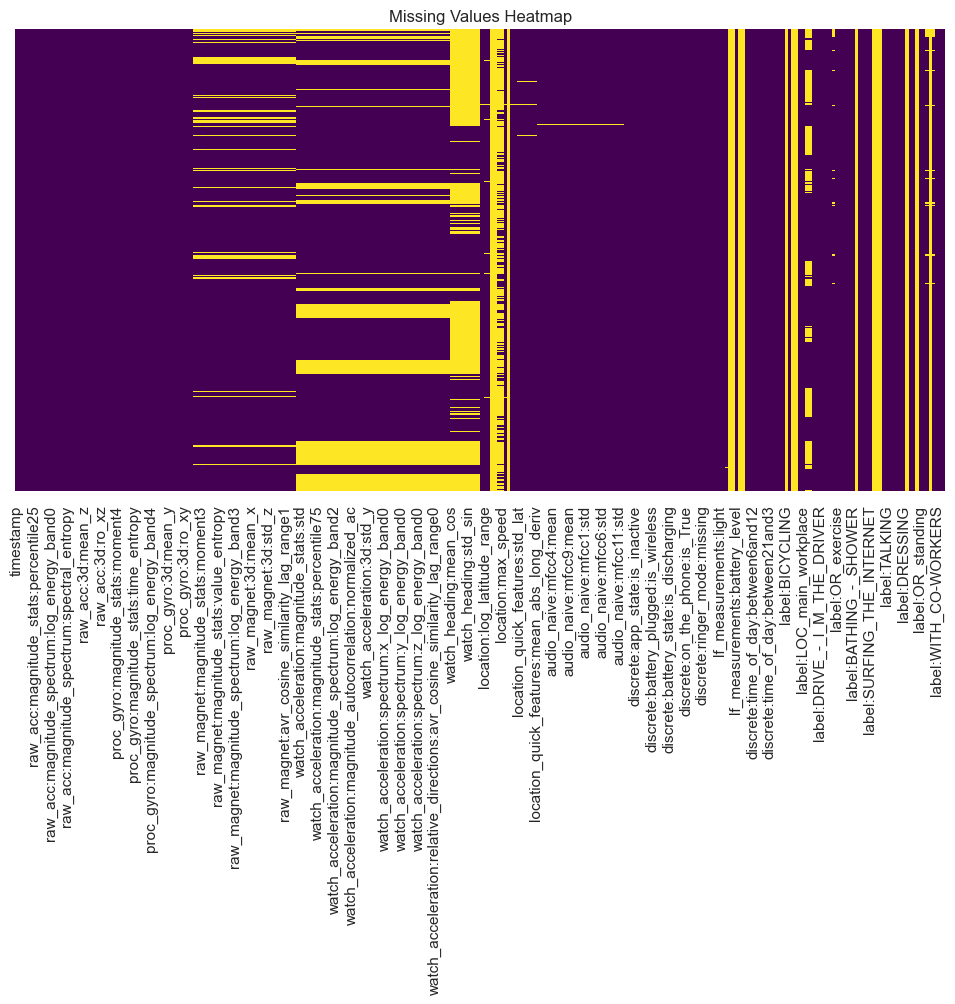

In [16]:
# Visualizing missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

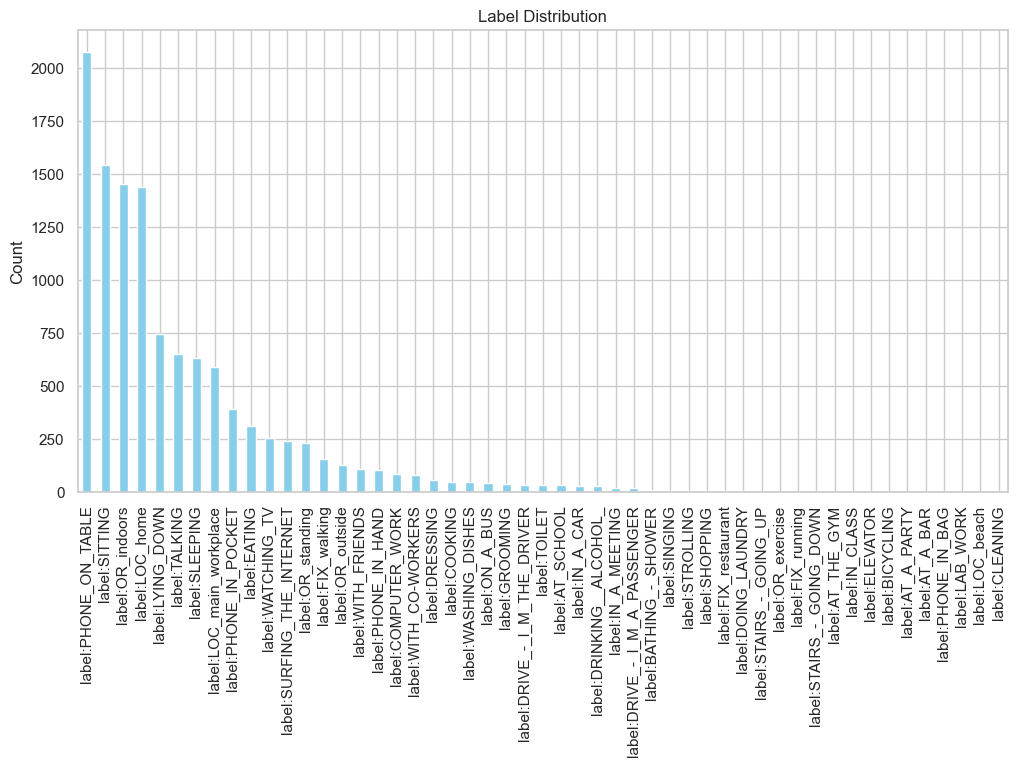

In [17]:
# Visualizing label distribution
plt.figure(figsize=(12, 6))
label_distribution.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Label Distribution")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

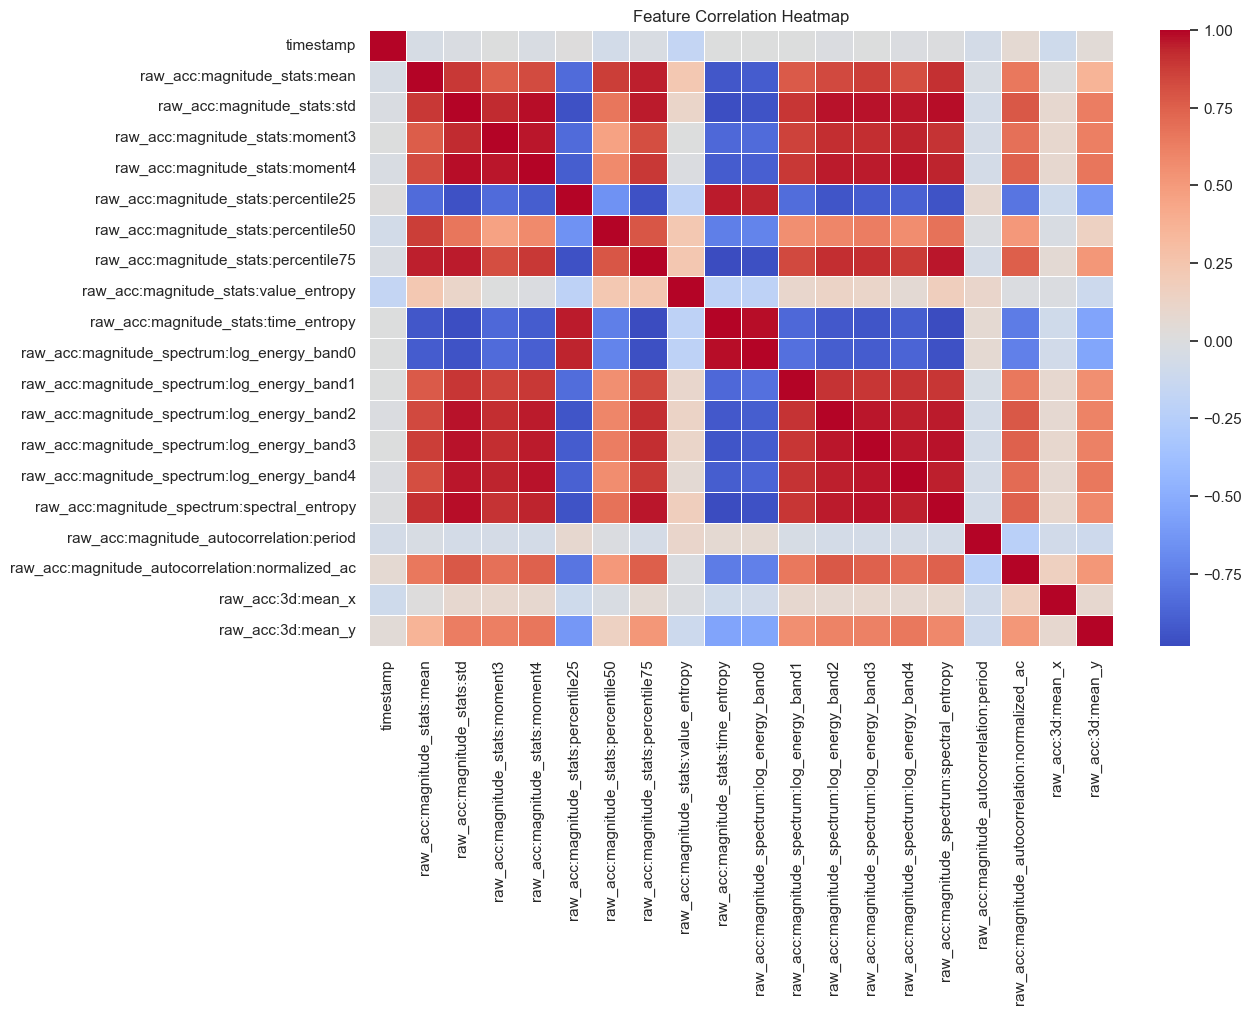

In [18]:
# Correlation heatmap for a subset of numerical features
num_features = df.select_dtypes(include=["float64", "int64"]).columns[:20]  # First 20 numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_features].corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Handling missing values

In [19]:
# Step 1: Drop columns with more than 50% missing values
threshold = 0.5 * len(df)  # 50% of total rows
df_cleaned = df.dropna(thresh=threshold, axis=1)

In [20]:
# Step 2: Fill numerical columns with their median
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

C:\Users\SibghatUllah\AppData\Local\Temp\ipykernel_15484\2896043320.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())


In [21]:
# Step 3: Fill categorical columns with their mode
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
for col in cat_cols:
    df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)

In [22]:
# Verify if missing values are handled
missing_after_cleaning = df_cleaned.isnull().sum().sum()
df_cleaned.shape, missing_after_cleaning

((2685, 250), 0)

In [24]:
df_cleaned.isnull().sum()

timestamp                                                                  0
raw_acc:magnitude_stats:mean                                               0
raw_acc:magnitude_stats:std                                                0
raw_acc:magnitude_stats:moment3                                            0
raw_acc:magnitude_stats:moment4                                            0
raw_acc:magnitude_stats:percentile25                                       0
raw_acc:magnitude_stats:percentile50                                       0
raw_acc:magnitude_stats:percentile75                                       0
raw_acc:magnitude_stats:value_entropy                                      0
raw_acc:magnitude_stats:time_entropy                                       0
raw_acc:magnitude_spectrum:log_energy_band0                                0
raw_acc:magnitude_spectrum:log_energy_band1                                0
raw_acc:magnitude_spectrum:log_energy_band2                                0